In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df=pd.read_table("C:\\Users\\CSLab\\Downloads\\q1.txt", index_col=None)
df

,Age,agegroup,height,status,yrsmarried
0,21.0,adult,6.0,single,-1.0
1,2.0,child,3.0,married,0.0
2,18.0,adult,5.7,married,20.0
3,221.0,ELDERLY,5.0,WIDOWED,2.0
4,34.0,child,-7.0,married,3.0
5,NaN,NaN,NaN,NaN,NaN


In [179]:
df.dropna(inplace=True)


In [183]:
df['agegroup']=df['agegroup'].astype('str')
df['status']=df['status'].astype('str')

In [173]:
df.dtypes

Age           float64
agegroup       object
height        float64
status         object
yrsmarried    float64
dtype: object

In [184]:
df['agegroup']=df['agegroup'].apply(lambda x:str.lower(x))
df['status']=df['status'].apply(lambda x:str.lower(x))
df

,Age,agegroup,height,status,yrsmarried
0,21.0,adult,6.0,single,-1.0
1,2.0,child,3.0,married,0.0
2,18.0,adult,5.7,married,20.0
3,221.0,elderly,5.0,widowed,2.0
4,34.0,child,-7.0,married,3.0


In [6]:
df['Age'].astype('float')
df['yrsmarried'].astype('float')

0    -1.0
1     0.0
2    20.0
3     2.0
4     3.0
Name: yrsmarried, dtype: float64

In [70]:
def ruleme(df):
    df['Rule1']=df['Age'].apply(lambda x: True if x>0 and x<150 else False)
    df['Rule2']=df.apply(lambda x: True if x.Age > x.yrsmarried else False , axis=1)
    df['Rule3']=df['status'].apply(lambda x : True if x in('married','single','widowed') else False)
    df['Rule4']=df.apply(lambda x :  True if (x.Age<18 and x.agegroup=='child' ) 
                                or (x.Age>18 and x.Age<65 and x.agegroup=='adult') 
                                or (x.Age>65 and x.agegroup=='elderly') else False , axis=1)
                               
    


In [185]:
ruleme(df)
df

,Age,agegroup,height,status,yrsmarried,Rule1,Rule2,Rule3,Rule4
0,21.0,adult,6.0,single,-1.0,True,True,True,True
1,2.0,child,3.0,married,0.0,True,True,True,True
2,18.0,adult,5.7,married,20.0,True,False,True,False
3,221.0,elderly,5.0,widowed,2.0,False,True,True,True
4,34.0,child,-7.0,married,3.0,True,True,True,False


In [186]:
res=pd.DataFrame((df['Rule1'].value_counts(),df['Rule2'].value_counts(),df['Rule3'].value_counts(),df['Rule4'].value_counts()))
res

,True,False
Rule1,4.0,1.0
Rule2,4.0,1.0
Rule3,5.0,NaN
Rule4,3.0,2.0


<BarContainer object of 4 artists>

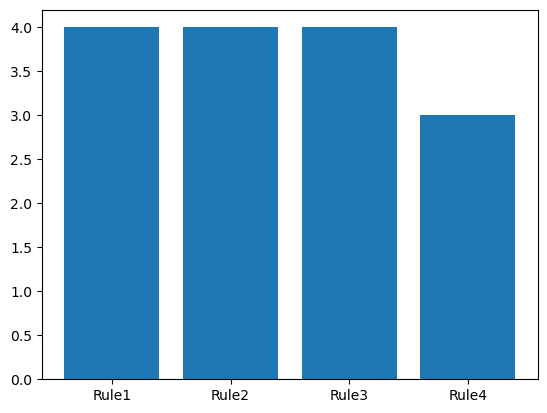

In [162]:
plt.bar( x.index,x)


Text(0.5, 1.0, 'Voilations')

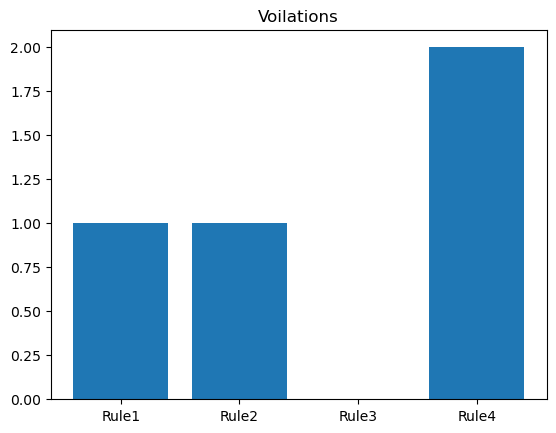

In [187]:
y=res[False]
plt.bar( y.index,y)
plt.title("Voilations")